In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

api_key = "tjhwakjgfhkasjdhfsajdflsj$$$"
api_request = "https://www.plaid.com/api/"

### 2. Generate a public token

In [6]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])
#create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID,['transactions'])

### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE
#client = Client(client_id='***', secret='***', public_key='***', environment='sandbox')
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
pub_access_token = exchange_response['access_token']



### 4. Fetch Accounts

---

In [26]:
accounts =client.Accounts.get(pub_access_token)
[*accounts]

['accounts', 'item', 'request_id']

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [8]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(pub_access_token, start_date, end_date)

### 2. Print the categories for each transaction

In [9]:
# YOUR CODE HERE
for cat in transactions_response:
    print(cat)

accounts
item
request_id
total_transactions
transactions


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [42]:
# YOUR CODE HERE

col1 = []
col2 = []
col3 = []
for transactions in transactions_response['transactions']:
    col1.append(json.dumps(transactions['date']))
    col2.append(json.dumps(transactions['name']))
    col3.append(json.dumps(transactions['amount']))

col1 = list(map(lambda item: item.strip("\""), col1))
col1 = pd.to_datetime(col1,infer_datetime_format=True).sort_values(ascending=True)

#col1.sort_values(ascending=False)

tmpDictionary = {'name':col2,'amount':col3}
transDF = pd.DataFrame(tmpDictionary,index = col1)

#transDF

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [56]:
# YOUR CODE HERE
#datetime handled at DF init
transDF['amount'] = list(map(lambda item: float(item), transDF['amount']))
#type(transDF['amount'][0])


500.0

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [40]:
# YOUR CODE HERE

income_response = client.Income.get(pub_access_token)

print(f"Previous years income: {income_response['income']['last_year_income']}")
print(f"Monthly Income: {income_response['income']['income_streams'][0]['monthly_income']}")
print(f"Projected yearly income: {income_response['income']['projected_yearly_income']}")

#pretty_print_response(income_response)

Previous years income: 6000
Monthly Income: 500
Projected yearly income: 6085


In [41]:
pretty_print_response(income_response)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "xQ08ek2WpbYn8gl"
}


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [68]:
# YOUR CODE HERE
#DF.plot(kind='bar', figsize=(20,10))

#transDF
transCat= transDF.groupby('name')
print(f"Spending per category:\n {transCat.sum()}\n")



Spending per category:
                                            amount
name                                             
"ACH Electronic CreditGUSTO PAY 123456"  17550.00
"AUTOMATIC PAYMENT - THANK"               6235.50
"CD DEPOSIT .INITIAL."                    3000.00
"CREDIT CARD 3333 PAYMENT *//"              75.00
"INTRST PYMNT"                             -12.66
"KFC"                                     1500.00
"Madison Bicycle Shop"                    1500.00
"McDonald's"                                36.00
"SparkFun"                                 268.20
"Starbucks"                                 12.99
"Tectra Inc"                              1500.00
"Touchstone Climbing"                      235.50
"Uber 063015 SF**POOL**"                    16.20
"Uber 072515 SF**POOL**"                    18.99
"United Airlines"                            0.00



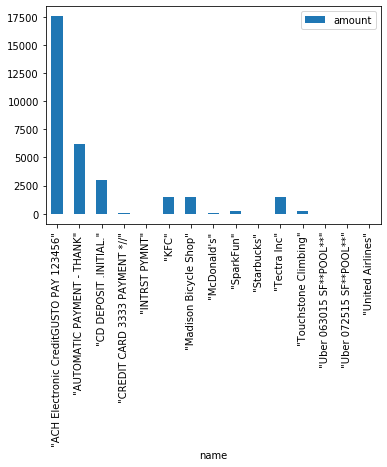

In [119]:
#transCat.plot(kind='bar', figsize=(20,10))
#transDF.plot.bar(x='name',y='amount', rot=90 , figsize=(25,10))
transCat.sum().plot.bar()


### Calculate the expenses per month

In [123]:
# YOUR CODE HERE
monthlySpending = transDF.groupby(by=[transDF.index.month, transDF.index.year])
print(f"Monthly Spending:\n {monthlySpending.sum()}\n")

Monthly Spending:
            amount
1  2020  10145.24
10 2019    500.00
11 2019  10645.24
12 2019  10645.24



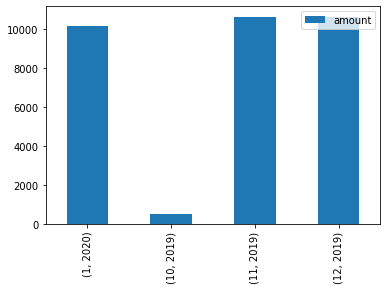

In [125]:
monthlySpending.sum().plot.bar()